<a href="https://www.kaggle.com/code/puneetsurya0921/data-analytics-task?scriptVersionId=110863707" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Task


1. Find Themes and Sub-Themes from the dataset.
2. You need to find the themes and sub-themes at an overall level, by years, by journal, by license type.
3. Carry out sentiment analysis for various themes and sub-themes in the dataset.
4. Use only abstract and title column for analysis. 
5. Present the findings in a pdf: approach used, analysis, outputs and insights.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
metadata_df = pd.read_csv("../input/CORD-19-research-challenge/metadata.csv",nrows=100)

In [3]:
metadata_df.shape #shows the number of rows and columns in the dataset

(100, 19)

In [4]:
metadata_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [5]:
#Checking number of null objects
metadata_df.isna().sum()

cord_uid              0
sha                   6
source_x              0
title                 0
doi                   0
pmcid                 0
pubmed_id             0
license               0
abstract              8
publish_time          0
authors               6
journal               0
mag_id              100
who_covidence_id    100
arxiv_id            100
pdf_json_files        6
pmc_json_files        9
url                   0
s2_id               100
dtype: int64

In [6]:
#As there are 100 out of 100 null objects we can drop those columns as it does not have any impact on our analysis
metadata_df.drop(['mag_id','who_covidence_id','arxiv_id','s2_id'],axis =1,inplace = True)

In [7]:
metadata_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,pdf_json_files,pmc_json_files,url
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...


In [8]:
metadata_df.isna().sum() #We have successfully handled the majority null values

cord_uid          0
sha               6
source_x          0
title             0
doi               0
pmcid             0
pubmed_id         0
license           0
abstract          8
publish_time      0
authors           6
journal           0
pdf_json_files    6
pmc_json_files    9
url               0
dtype: int64

In [9]:
#Finding number of articles published by each journal
metadata_df.groupby(['journal']).size().groupby(level=0).max()

journal
AIDS Res Ther                                               1
Ann Clin Microbiol Antimicrob                               1
Aust New Zealand Health Policy                              2
BMC Bioinformatics                                          2
BMC Biotechnol                                              1
BMC Gastroenterol                                           1
BMC Genomics                                                2
BMC Infect Dis                                              2
BMC Med Ethics                                              2
BMC Mol Biol                                                1
BMC Public Health                                           8
Biol Proced Online                                          1
Cell Microbiol                                              1
Clinical Chemistry                                          1
Crit Care                                                   6
EMBO J                                                      2


***We find that the Nuleic Acids Res has got the highest number of publications***

In [10]:
metadata_df.groupby(['license']).size().groupby(level=0).max()

license
bronze-oa     3
cc-by        46
cc-by-nc      7
cc0           2
green-oa      4
no-cc        38
dtype: int64

***Most publications i.e 46 were published under the cc-by license type compared to the cc0 type with only 2 publications***

In [11]:
metadata_df.groupby(['license','journal']).size()

license    journal                                                
bronze-oa  Clinical Chemistry                                         1
           Journal of Neuropathology and Experimental Neurology       1
           Journal of the American Medical Informatics Association    1
cc-by      AIDS Res Ther                                              1
           Ann Clin Microbiol Antimicrob                              1
           Aust New Zealand Health Policy                             2
           BMC Bioinformatics                                         2
           BMC Biotechnol                                             1
           BMC Gastroenterol                                          1
           BMC Genomics                                               2
           BMC Infect Dis                                             1
           BMC Med Ethics                                             2
           BMC Mol Biol                                              

***We find that the Nucleic Acids Res has got 2 license types namely 'cc-by-cc' and 'no-cc'***

In [12]:
metadata_df.groupby(['publish_time']).size().groupby(level=0).max()

publish_time
1997-03-03    1
2000-04-17    1
2000-08-01    1
2000-08-15    1
2000-08-25    1
             ..
2007-05-29    1
2007-05-30    1
2007-06-04    1
2007-06-06    1
2007-06-11    1
Length: 88, dtype: int64

***We can get better analysis by extracting the year column from the publish_time column***

In [13]:
metadata_df.dtypes

cord_uid          object
sha               object
source_x          object
title             object
doi               object
pmcid             object
pubmed_id          int64
license           object
abstract          object
publish_time      object
authors           object
journal           object
pdf_json_files    object
pmc_json_files    object
url               object
dtype: object

***We found that the publish_time data type was given as string instead of datetime datatype***

In [14]:
#Converting the datatype to datetime
metadata_df['publish_time'] = pd.to_datetime(metadata_df['publish_time'], format='%Y-%m-%d')


In [15]:
metadata_df.dtypes

cord_uid                  object
sha                       object
source_x                  object
title                     object
doi                       object
pmcid                     object
pubmed_id                  int64
license                   object
abstract                  object
publish_time      datetime64[ns]
authors                   object
journal                   object
pdf_json_files            object
pmc_json_files            object
url                       object
dtype: object

In [16]:
metadata_df['year'] = metadata_df['publish_time'].dt.year

In [17]:
metadata_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,pdf_json_files,pmc_json_files,url,year
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2001
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2000
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2000
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2001
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2001


In [18]:
metadata_df.groupby(['year']).size().groupby(level = 0).max()

year
1997     1
2000     5
2001     7
2002     1
2003     4
2004    10
2005    23
2006    36
2007    13
dtype: int64

* ***We find that 1997 and 2002 has got least number of publications i.e. 1***
* ***Highest number of publications were published in 2006 i.e. 36***
* ***There has been increasing trend from 1997 but for some reason got only 1 publication in 2000 and saw a decline again in 2007***

In [19]:
metadata_df.groupby(['year','journal'])['title'].size()

year  journal          
1997  EMBO J               1
2000  EMBO J               1
      Respir Res           2
      The EMBO Journal     2
2001  BMC Infect Dis       1
                          ..
2007  Cell Microbiol       1
      Nucleic Acids Res    1
      PLoS One             5
      PLoS Pathog          1
      Virol J              1
Name: title, Length: 69, dtype: int64

In [20]:
metadata_df.groupby(['year','license']).size()

year  license  
1997  no-cc         1
2000  green-oa      2
      no-cc         3
2001  green-oa      1
      no-cc         6
2002  no-cc         1
2003  bronze-oa     1
      no-cc         3
2004  bronze-oa     1
      cc-by         3
      no-cc         6
2005  cc-by        11
      green-oa      1
      no-cc        11
2006  bronze-oa     1
      cc-by        23
      cc-by-nc      6
      no-cc         6
2007  cc-by         9
      cc-by-nc      1
      cc0           2
      no-cc         1
dtype: int64

**Extracting the title and abstract column for sentiment analysis**

In [21]:
metadata1 = metadata_df[['title','abstract']]
metadata1.head()

,title,abstract
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...


In [22]:
metadata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     100 non-null    object
 1   abstract  92 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


**It shows there are 8 null objects in abstract column**

In [23]:
metadata1.dropna(how = "any",axis = 0, inplace = True)
metadata1.reset_index(drop = True, inplace = True)
metadata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     92 non-null     object
 1   abstract  92 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [24]:
metadata1['text'] = metadata1['title'] + metadata1['abstract']
metadata1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,abstract,text
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,Clinical features of culture-proven Mycoplasma...
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,Nitric oxide: a pro-inflammatory mediator in l...
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,Surfactant protein-D and pulmonary host defens...
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,Role of endothelin-1 in lung diseaseEndothelin...
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,Gene expression in epithelial cells in respons...
...,...,...,...
87,Global Surveillance of Emerging Influenza Viru...,BACKGROUND: Effective influenza surveillance r...,Global Surveillance of Emerging Influenza Viru...
88,Transmission Parameters of the 2001 Foot and M...,"Despite intensive ongoing research, key aspect...",Transmission Parameters of the 2001 Foot and M...
89,Efficient replication of pneumonia virus of mi...,Pneumonia virus of mice (PVM; family Paramyxov...,Efficient replication of pneumonia virus of mi...
90,Designing and conducting tabletop exercises to...,"BACKGROUND: Since 2001, state and local health...",Designing and conducting tabletop exercises to...


import nltk
from textblob import Word
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

In [25]:
metadata1['text'] = metadata1['text'].astype(str).str.lower()
metadata1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,abstract,text
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,clinical features of culture-proven mycoplasma...
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,nitric oxide: a pro-inflammatory mediator in l...
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,surfactant protein-d and pulmonary host defens...
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,role of endothelin-1 in lung diseaseendothelin...
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,gene expression in epithelial cells in respons...


**Using Regexp to tokenize the words**

In [26]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

metadata1['text_token'] = metadata1['text'].apply(regexp.tokenize)

metadata1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,title,abstract,text,text_token
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,clinical features of culture-proven mycoplasma...,"[clinical, features, of, culture, proven, myco..."
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,nitric oxide: a pro-inflammatory mediator in l...,"[nitric, oxide, a, pro, inflammatory, mediator..."
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,surfactant protein-d and pulmonary host defens...,"[surfactant, protein, d, and, pulmonary, host,..."
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,role of endothelin-1 in lung diseaseendothelin...,"[role, of, endothelin, 1, in, lung, diseaseend..."
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,gene expression in epithelial cells in respons...,"[gene, expression, in, epithelial, cells, in, ..."


In [27]:
import nltk
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

**Remove stopwords**

In [28]:

metadata1['text_token'] = metadata1['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
metadata1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,abstract,text,text_token
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,clinical features of culture-proven mycoplasma...,"[clinical, features, culture, proven, mycoplas..."
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,nitric oxide: a pro-inflammatory mediator in l...,"[nitric, oxide, pro, inflammatory, mediator, l..."
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,surfactant protein-d and pulmonary host defens...,"[surfactant, protein, pulmonary, host, defense..."
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,role of endothelin-1 in lung diseaseendothelin...,"[role, endothelin, 1, lung, diseaseendothelin,..."
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,gene expression in epithelial cells in respons...,"[gene, expression, epithelial, cells, response..."


In [29]:
metadata1['text_string'] = metadata1['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
metadata1[['text','text_token','text_string']]

,text,text_token,text_string
0,clinical features of culture-proven mycoplasma...,"[clinical, features, culture, proven, mycoplas...",clinical features culture proven mycoplasma pn...
1,nitric oxide: a pro-inflammatory mediator in l...,"[nitric, oxide, pro, inflammatory, mediator, l...",nitric oxide pro inflammatory mediator lung di...
2,surfactant protein-d and pulmonary host defens...,"[surfactant, protein, pulmonary, host, defense...",surfactant protein pulmonary host defensesurfa...
3,role of endothelin-1 in lung diseaseendothelin...,"[role, endothelin, 1, lung, diseaseendothelin,...",role endothelin lung diseaseendothelin amino a...
4,gene expression in epithelial cells in respons...,"[gene, expression, epithelial, cells, response...",gene expression epithelial cells response pneu...
...,...,...,...
87,global surveillance of emerging influenza viru...,"[global, surveillance, emerging, influenza, vi...",global surveillance emerging influenza virus g...
88,transmission parameters of the 2001 foot and m...,"[transmission, parameters, 2001, foot, mouth, ...",transmission parameters 2001 foot mouth epidem...
89,efficient replication of pneumonia virus of mi...,"[efficient, replication, pneumonia, virus, mic...",efficient replication pneumonia virus mice pvm...
90,designing and conducting tabletop exercises to...,"[designing, conducting, tabletop, exercises, a...",designing conducting tabletop exercises assess...


In [31]:
#Create a list of all words

all_words = ' '.join([word for word in metadata1['text_string']])


In [32]:
#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [33]:
# Create a frequency distribution which records the number of times each word has occurred:

from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'health': 78, 'rna': 63, 'virus': 62, 'expression': 56, 'results': 50, 'patients': 49, 'public': 49, 'gene': 48, 'protein': 47, 'viral': 44, ...})

***Now we can use our fdist dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4).
Since our dataset is really small, we don’t filter out any words and set the value to greater or equal to 1 (otherwise there are not many words left in this particular dataset)***

In [34]:

metadata1['text_string_fdist'] = metadata1['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
metadata1[['text', 'text_token', 'text_string', 'text_string_fdist']].head()

,text,text_token,text_string,text_string_fdist
0,clinical features of culture-proven mycoplasma...,"[clinical, features, culture, proven, mycoplas...",clinical features culture proven mycoplasma pn...,clinical features culture proven mycoplasma pn...
1,nitric oxide: a pro-inflammatory mediator in l...,"[nitric, oxide, pro, inflammatory, mediator, l...",nitric oxide pro inflammatory mediator lung di...,nitric oxide pro inflammatory mediator lung di...
2,surfactant protein-d and pulmonary host defens...,"[surfactant, protein, pulmonary, host, defense...",surfactant protein pulmonary host defensesurfa...,surfactant protein pulmonary host defensesurfa...
3,role of endothelin-1 in lung diseaseendothelin...,"[role, endothelin, 1, lung, diseaseendothelin,...",role endothelin lung diseaseendothelin amino a...,role endothelin lung diseaseendothelin amino a...
4,gene expression in epithelial cells in respons...,"[gene, expression, epithelial, cells, response...",gene expression epithelial cells response pneu...,gene expression epithelial cells response pneu...


In [36]:
fdist.most_common(3)

[('health', 78), ('rna', 63), ('virus', 62)]

In [37]:
fdist.tabulate(3)

health    rna  virus 
    78     63     62 


# Plot common words

In [38]:
# Obtain top 10 words
top_10 = fdist.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

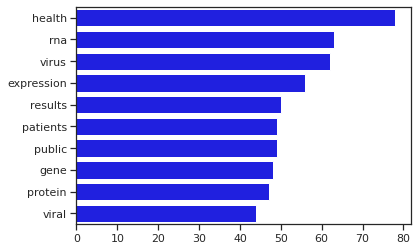

In [39]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [40]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

# Search Specific words

In [41]:
# Show frequency of a specific word
fdist["viral"]

44

# Word Cloud

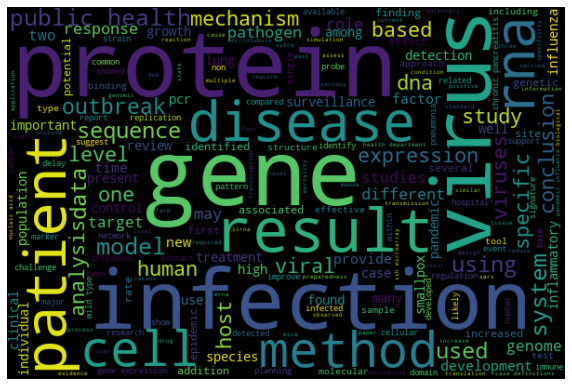

In [42]:

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

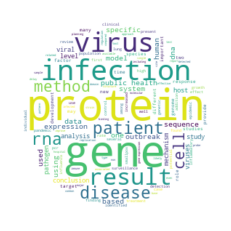

In [43]:
#Different style:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

# Sentiment analysis
# VADER lexicon
NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for “Valence Aware Dictionary and Sentiment Reasoner” (Hutto & Gilbert, 2014).

# Sentiment Intensity Analyzer
Initialize an object of SentimentIntensityAnalyzer with name “analyzer”:

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Polarity scores
Use the polarity_scores method:

In [45]:
metadata1['polarity'] = metadata1['text_string_fdist'].apply(lambda x: analyzer.polarity_scores(x))
metadata1.tail(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,abstract,text,text_token,text_string,text_string_fdist,polarity
89,Efficient replication of pneumonia virus of mi...,Pneumonia virus of mice (PVM; family Paramyxov...,efficient replication of pneumonia virus of mi...,"[efficient, replication, pneumonia, virus, mic...",efficient replication pneumonia virus mice pvm...,efficient replication pneumonia virus mice pvm...,"{'neg': 0.057, 'neu': 0.862, 'pos': 0.081, 'co..."
90,Designing and conducting tabletop exercises to...,"BACKGROUND: Since 2001, state and local health...",designing and conducting tabletop exercises to...,"[designing, conducting, tabletop, exercises, a...",designing conducting tabletop exercises assess...,designing conducting tabletop exercises assess...,"{'neg': 0.05, 'neu': 0.843, 'pos': 0.107, 'com..."
91,Transcript-level annotation of Affymetrix prob...,BACKGROUND: The wide use of Affymetrix microar...,transcript-level annotation of affymetrix prob...,"[transcript, level, annotation, affymetrix, pr...",transcript level annotation affymetrix probese...,transcript level annotation affymetrix probese...,"{'neg': 0.014, 'neu': 0.86, 'pos': 0.126, 'com..."


# Transform data
Change data structure

In [46]:
metadata1 = pd.concat(
    [metadata1.drop(['title','abstract'],axis=1),metadata1['polarity'].apply(pd.Series)], axis=1)
metadata1.head(3)

,text,text_token,text_string,text_string_fdist,polarity,neg,neu,pos,compound
0,clinical features of culture-proven mycoplasma...,"[clinical, features, culture, proven, mycoplas...",clinical features culture proven mycoplasma pn...,clinical features culture proven mycoplasma pn...,"{'neg': 0.092, 'neu': 0.886, 'pos': 0.022, 'co...",0.092,0.886,0.022,-0.8779
1,nitric oxide: a pro-inflammatory mediator in l...,"[nitric, oxide, pro, inflammatory, mediator, l...",nitric oxide pro inflammatory mediator lung di...,nitric oxide pro inflammatory mediator lung di...,"{'neg': 0.125, 'neu': 0.828, 'pos': 0.048, 'co...",0.125,0.828,0.048,-0.7717
2,surfactant protein-d and pulmonary host defens...,"[surfactant, protein, pulmonary, host, defense...",surfactant protein pulmonary host defensesurfa...,surfactant protein pulmonary host defensesurfa...,"{'neg': 0.036, 'neu': 0.91, 'pos': 0.054, 'com...",0.036,0.910,0.054,0.1531


In [47]:
# Create new variable with sentiment "neutral," "positive" and "negative"
metadata1['sentiment'] = metadata1['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
metadata1.head()

,text,text_token,text_string,text_string_fdist,polarity,neg,neu,pos,compound,sentiment
0,clinical features of culture-proven mycoplasma...,"[clinical, features, culture, proven, mycoplas...",clinical features culture proven mycoplasma pn...,clinical features culture proven mycoplasma pn...,"{'neg': 0.092, 'neu': 0.886, 'pos': 0.022, 'co...",0.092,0.886,0.022,-0.8779,negative
1,nitric oxide: a pro-inflammatory mediator in l...,"[nitric, oxide, pro, inflammatory, mediator, l...",nitric oxide pro inflammatory mediator lung di...,nitric oxide pro inflammatory mediator lung di...,"{'neg': 0.125, 'neu': 0.828, 'pos': 0.048, 'co...",0.125,0.828,0.048,-0.7717,negative
2,surfactant protein-d and pulmonary host defens...,"[surfactant, protein, pulmonary, host, defense...",surfactant protein pulmonary host defensesurfa...,surfactant protein pulmonary host defensesurfa...,"{'neg': 0.036, 'neu': 0.91, 'pos': 0.054, 'com...",0.036,0.910,0.054,0.1531,positive
3,role of endothelin-1 in lung diseaseendothelin...,"[role, endothelin, 1, lung, diseaseendothelin,...",role endothelin lung diseaseendothelin amino a...,role endothelin lung diseaseendothelin amino a...,"{'neg': 0.0, 'neu': 0.942, 'pos': 0.058, 'comp...",0.000,0.942,0.058,0.3400,positive
4,gene expression in epithelial cells in respons...,"[gene, expression, epithelial, cells, response...",gene expression epithelial cells response pneu...,gene expression epithelial cells response pneu...,"{'neg': 0.0, 'neu': 0.949, 'pos': 0.051, 'comp...",0.000,0.949,0.051,0.4939,positive


# Analyze data

Title with highest positive sentiment

In [48]:
metadata1.loc[metadata1['compound'].idxmax()].values

array(['pandemic influenza preparedness: an ethical framework to guide decision-makingbackground: planning for the next pandemic influenza outbreak is underway in hospitals across the world. the global sars experience has taught us that ethical frameworks to guide decision-making may help to reduce collateral damage and increase trust and solidarity within and between health care organisations. good pandemic planning requires reflection on values because science alone cannot tell us how to prepare for a public health crisis. discussion: in this paper, we present an ethical framework for pandemic influenza planning. the ethical framework was developed with expertise from clinical, organisational and public health ethics and validated through a stakeholder engagement process. the ethical framework includes both substantive and procedural elements for ethical pandemic influenza planning. the incorporation of ethics into pandemic planning can be helped by senior hospital administrators spo

Title with highest negative sentiment

In [49]:
metadata1.loc[metadata1['compound'].idxmin()].values

array(['public awareness of risk factors for cancer among the japanese general population: a population-based surveybackground: the present study aimed to provide information on awareness of the attributable fraction of cancer causes among the japanese general population. methods: a nationwide representative sample of 2,000 japanese aged 20 or older was asked about their perception and level of concern about various environmental and genetic risk factors in relation to cancer prevention, as a part of an omnibus survey. interviews were conducted with 1,355 subjects (609 men and 746 women). results: among 12 risk factor candidates, the attributable fraction of cancer-causing viral and bacterial infection was considered highest (51%), followed by that of tobacco smoking (43%), stress (39%), and endocrine-disrupting chemicals (37%). on the other hand, the attributable fractions of cancer by charred fish and meat (21%) and alcohol drinking (22%) were considered low compared with other risk 

# Visualize data

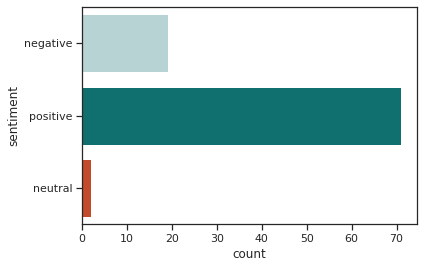

In [50]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=metadata1, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

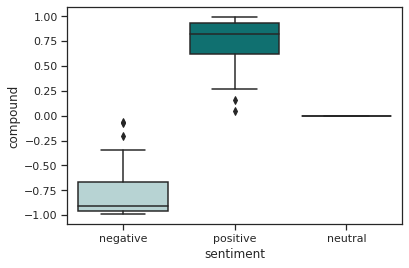

In [51]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=metadata1);

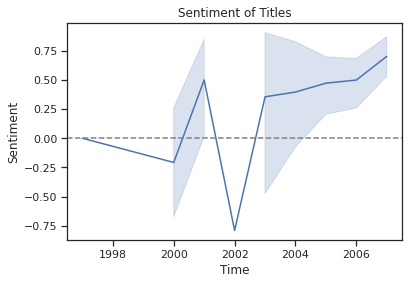

In [52]:
# Lineplot
g = sns.lineplot(x=metadata_df['year'], y=metadata1['compound'])


g.set(title='Sentiment of Titles')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")


g.axhline(0, ls='--', c = 'grey');